In [21]:
import matplotlib.pyplot as plt
import pandas as pd

from excel_manager import ExcelManager

In [22]:
path_input_excel =  r"C:\Users\robbe\Downloads\Gas_production_KRA_BEP_R.Grobben_final_01_run_File.xlsx"

#make instance of excel manger
manager = ExcelManager(path_input_excel)

# load the workbook in
manager.load_workbook()

In [23]:
# check the sheet names
sheet_names = manager.get_sheet_names()
print(sheet_names)

['Notes', 'GT1.1', 'GT1.2', 'GT2.1', 'GT2.2', 'GT3.1', 'GT3.2', 'GT4.1', 'GT4.2', 'GT5.1', 'GT5.2', 'GT6.1', 'GT6.2', 'GT7.1', 'GT7.2', 'GT8.1', 'GT8.2']


In [24]:
column_names = ['Sample ID', 'Parallel', 'Date', 'Time', 'P atm', 'P sample before gc', 'P sample after gc', 'CH4', 'CO2', 'O2', 'N2', 'Flush (1=yes; 0=no)', 'Comments', 'GC method', 'Weight', 'Date + Time', 'Day', 'Sum', 'CH4-corr', 'CO2-corr', 'O2-corr', 'N2-corr', 'Sum-corr', 'mg_bs', 'mCO2_b', 'mCH4_b', 'mO2_b', 'mN2_b', 'mCTot_b', 'mg_as', 'mCO2_a', 'mCH4_a', 'mO2_a', 'mN2_a', 'mCTot_a', 'mCTot_produced', 'O2 consumed', 'CO2 produced', 'O2 consumed_cum', 'CO2 produced_cum', 'mCTot_produced_cum', 'Cgas_DM_cum', 'PP CO2_b', 'CO2_aq [mol/m3]', 'CO2_aq [mol]', 'CO2_produced_aq', 'DIC_cum', 'Ctot_DM', 'Ratio O2/CO2']
column_units = ['', '', '', '', 'hPa', 'hPa', 'hPa', '%', '%', '%', '%', '', '', '', 'g', '', '', '%', '%', '%', '%', '%', 'mol', 'mol', 'mol', 'mol', 'mol', 'mol', 'mol', 'mol', 'mol', 'mol', 'mol', 'mol', 'mol', 'mol', 'mol', 'mol', 'mol', 'mol', 'mg C/gDW', 'Pa', 'mol/m3', 'mol', 'Pa', 'mol/m3', 'mol', 'mol', 'mg C/gDW', 'mg C/gDW', '-']

column_units_dict = dict(zip(column_names, column_units))
print(len(column_names))

49


In [25]:
sample_sheet_names = sheet_names[1:-1]
dict_data_frames = {}

for sheet_name in sample_sheet_names:
    dict_data_frames[sheet_name] = manager.load_sheet_table_with_input_header(sheet_name=sheet_name, start_row=12, end_column=49, column_names=column_names)
    print(f"{sheet_name} is done")

GT1.1 is done
GT1.2 is done
GT2.1 is done
GT2.2 is done
GT3.1 is done
GT3.2 is done
GT4.1 is done
GT4.2 is done
GT5.1 is done
GT5.2 is done
GT6.1 is done
GT6.2 is done
GT7.1 is done
GT7.2 is done
GT8.1 is done


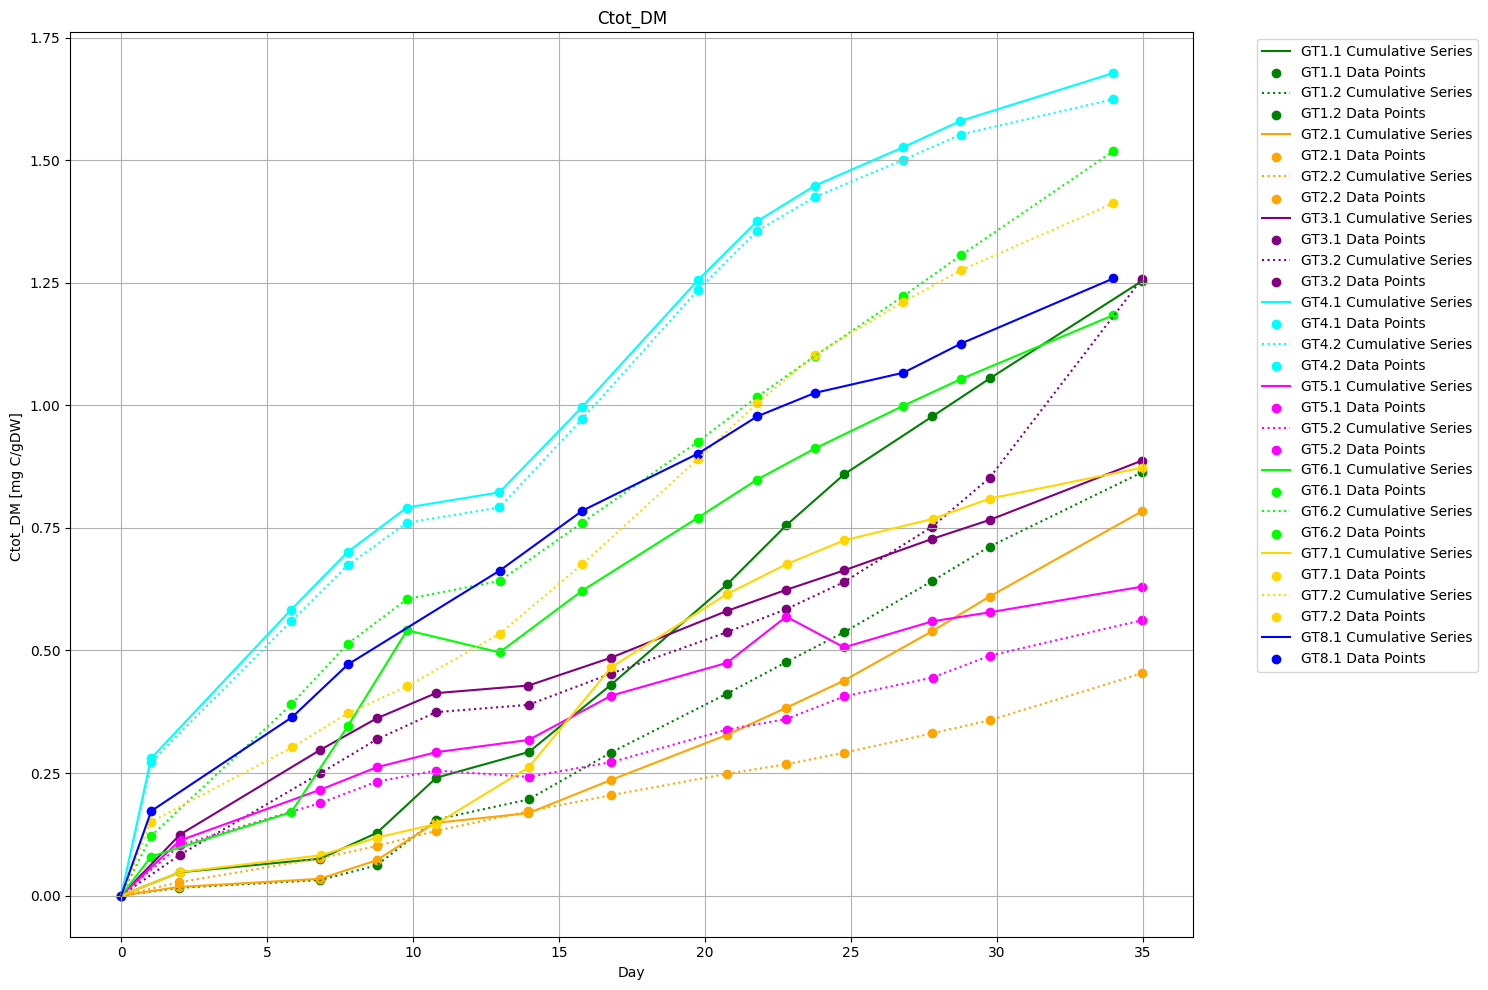

In [26]:
colors = ['green', "green", 'orange', 'orange', 'purple', 'purple', 'cyan', 'cyan',
          'magenta', 'magenta', 'lime', 'lime', 'gold', 'gold', 'blue', 'blue']
line_styles = ["solid", "dotted", "solid", "dotted", "solid", "dotted", "solid", "dotted", "solid", "dotted", "solid", "dotted", "solid", "dotted", "solid", "dotted"]

plt.figure(figsize=(15, 10))
for color, sheet_name, line_style in zip(colors, sample_sheet_names, line_styles):
    df = dict_data_frames[sheet_name]

    # Drop the rows where 'CumulativeColumn' is NaN
    df_dropped = df.dropna(subset=['Cgas_DM_cum'])

    # Plot the line
    plt.plot(df_dropped['Day'], df_dropped['Cgas_DM_cum'], linestyle=line_style, color=color, label=f'{sheet_name} Cumulative Series')

    # Plot the data points
    plt.scatter(df_dropped['Day'], df_dropped['Cgas_DM_cum'], color=color, label=f'{sheet_name} Data Points')

plt.title('Ctot_DM')
plt.xlabel('Day')
plt.ylabel('Ctot_DM [mg C/gDW] ')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Position the legend to the right of the plot
plt.tight_layout()
plt.grid()# Show the legend
plt.show()


In [27]:
def check_cumulative_2(df, column_name):
    if column_name not in df.columns:
        raise ValueError("The dataframe does not contain the specified column.")

    false_rows = []
    for i in range(1, len(df)):
        if df[column_name].iloc[i] < df[column_name].iloc[i-1]:
            false_rows.append(i)

    return false_rows

In [28]:
dict_incorrect_cum = {}

for sheet_name in sample_sheet_names:
    incorrect_index_list =  check_cumulative_2(df=dict_data_frames[sheet_name], column_name="Cgas_DM_cum")
    dict_incorrect_cum[sheet_name] = incorrect_index_list

print(dict_incorrect_cum)


{'GT1.1': [], 'GT1.2': [], 'GT2.1': [], 'GT2.2': [], 'GT3.1': [], 'GT3.2': [], 'GT4.1': [], 'GT4.2': [], 'GT5.1': [13], 'GT5.2': [7], 'GT6.1': [7], 'GT6.2': [], 'GT7.1': [], 'GT7.2': [], 'GT8.1': []}


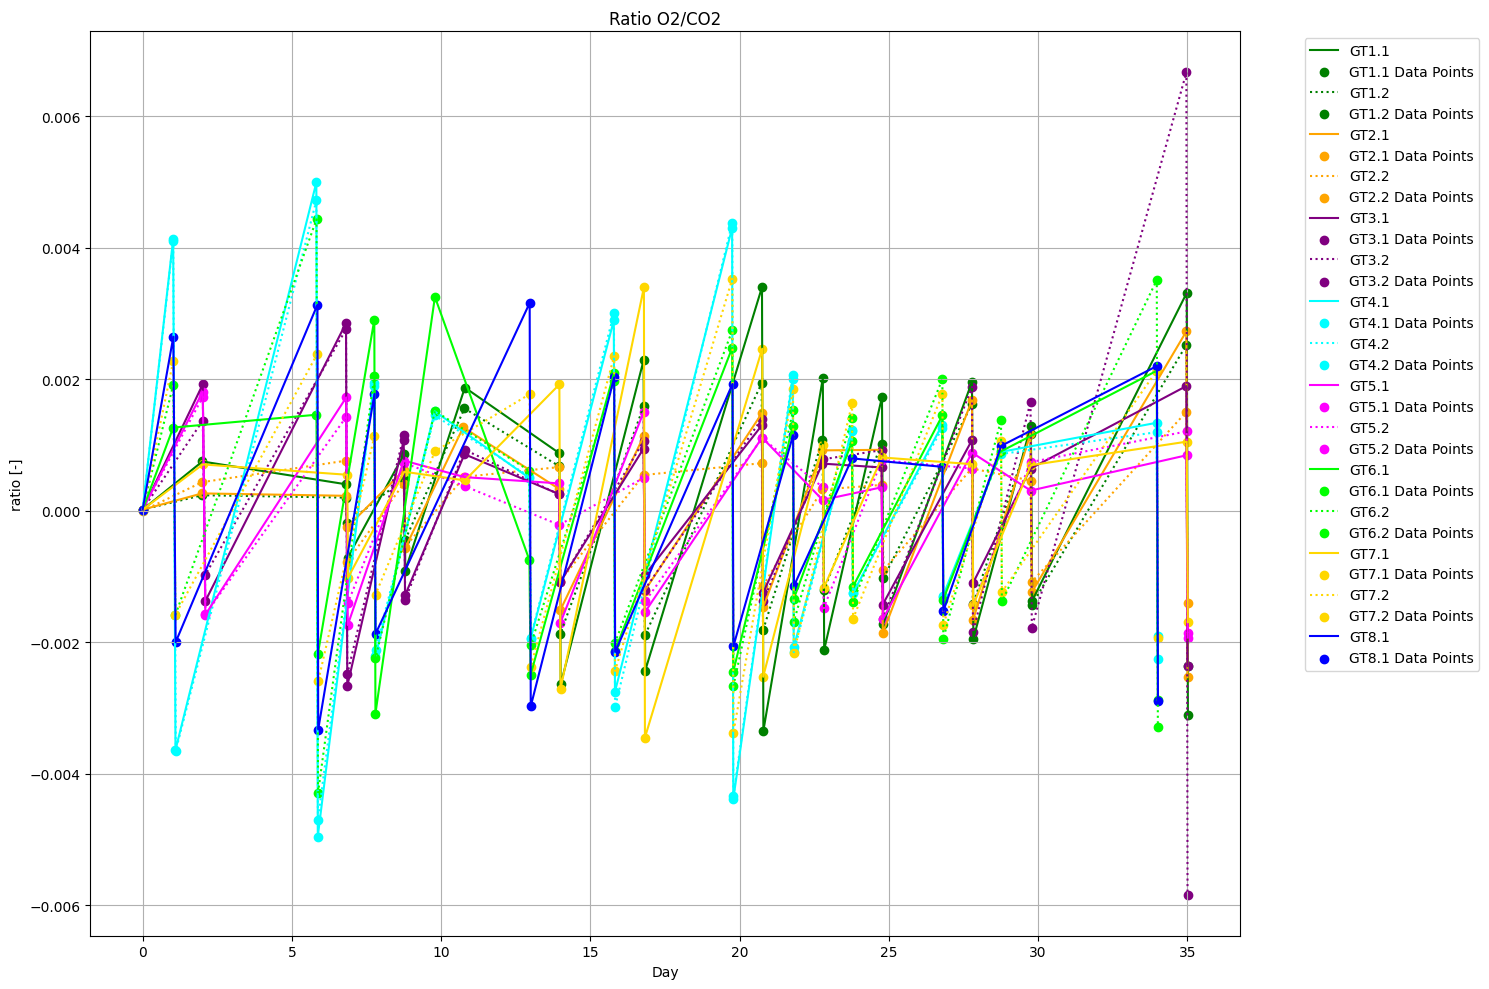

In [35]:
colors = ['green', "green", 'orange', 'orange', 'purple', 'purple', 'cyan', 'cyan',
          'magenta', 'magenta', 'lime', 'lime', 'gold', 'gold', 'blue', 'blue']
line_styles = ["solid", "dotted", "solid", "dotted", "solid", "dotted", "solid", "dotted", "solid", "dotted", "solid", "dotted", "solid", "dotted", "solid", "dotted"]

plt.figure(figsize=(15, 10))
for color, sheet_name, line_style in zip(colors, sample_sheet_names, line_styles):
    df = dict_data_frames[sheet_name]

    # Drop the rows where 'CumulativeColumn' is NaN
    df_dropped = df.dropna(subset=['Ratio O2/CO2'])

    # Plot the line
    plt.plot(df_dropped['Day'], df_dropped['Ratio O2/CO2'], linestyle=line_style, color=color, label=f'{sheet_name}')

    # Plot the data points
    plt.scatter(df_dropped['Day'], df_dropped['Ratio O2/CO2'], color=color, label=f'{sheet_name} Data Points')

plt.title('Ratio O2/CO2')
plt.xlabel('Day')
plt.ylabel('ratio [-]')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Position the legend to the right of the plot
plt.tight_layout()
plt.grid()# Show the legend
plt.show()


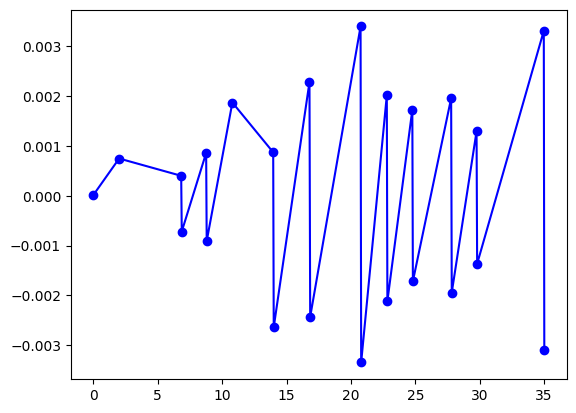

In [31]:
df = dict_data_frames["GT1.1"]

# Drop the rows where 'CumulativeColumn' is NaN
df_dropped = df.dropna(subset=['Ratio O2/CO2'])
# Plot the line
plt.plot(df_dropped['Day'], df_dropped['Ratio O2/CO2'], linestyle=line_style, color=color, label=f'{sheet_name} Cumulative Series')
# Plot the data points
plt.scatter(df_dropped['Day'], df_dropped['Ratio O2/CO2'], color=color, label=f'{sheet_name} Data Points')